# Salary_hike : Build a prediction model for Salary_hike

In [1]:
#Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
df = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#Data Description
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#EDA and data visualization

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

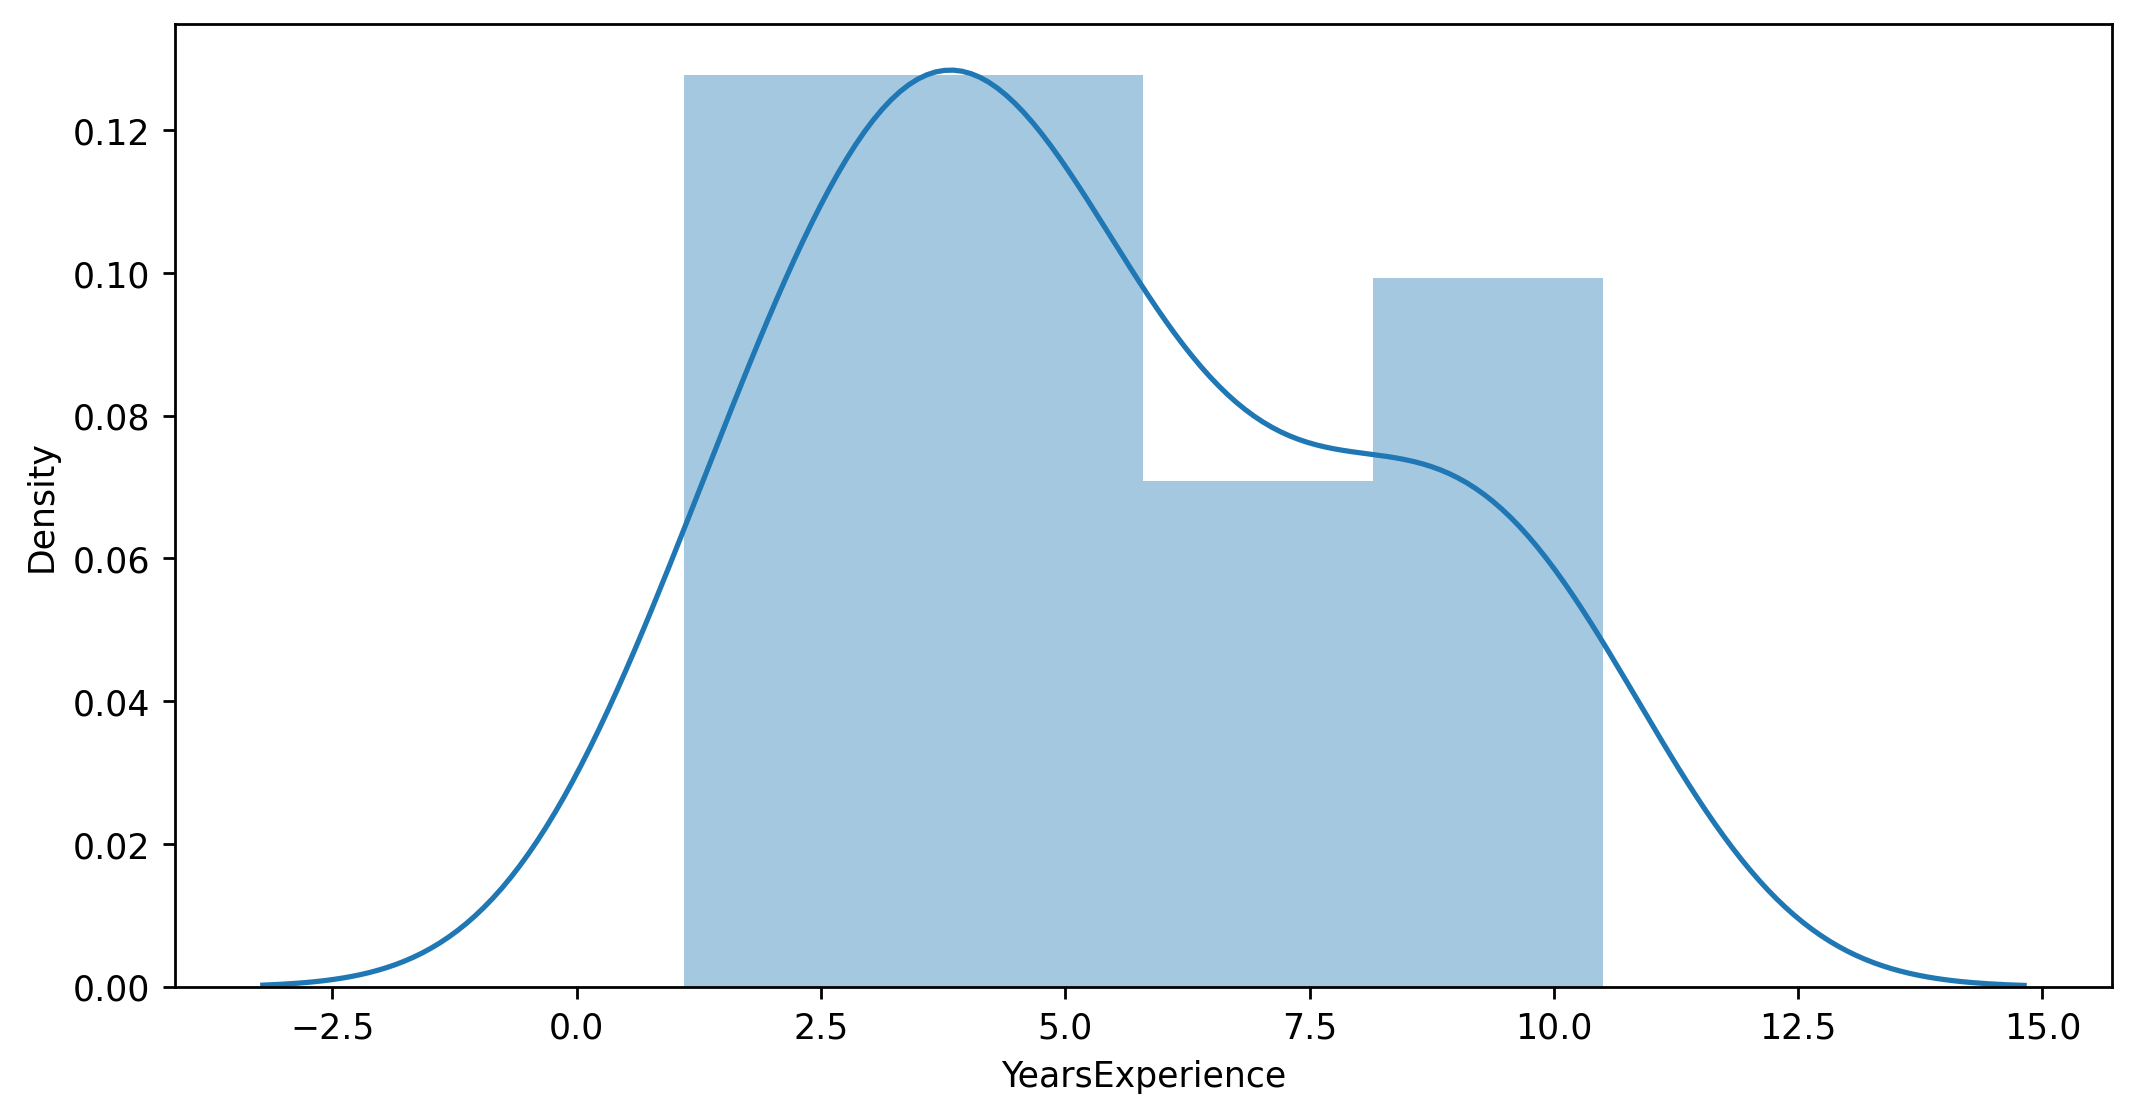

In [6]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

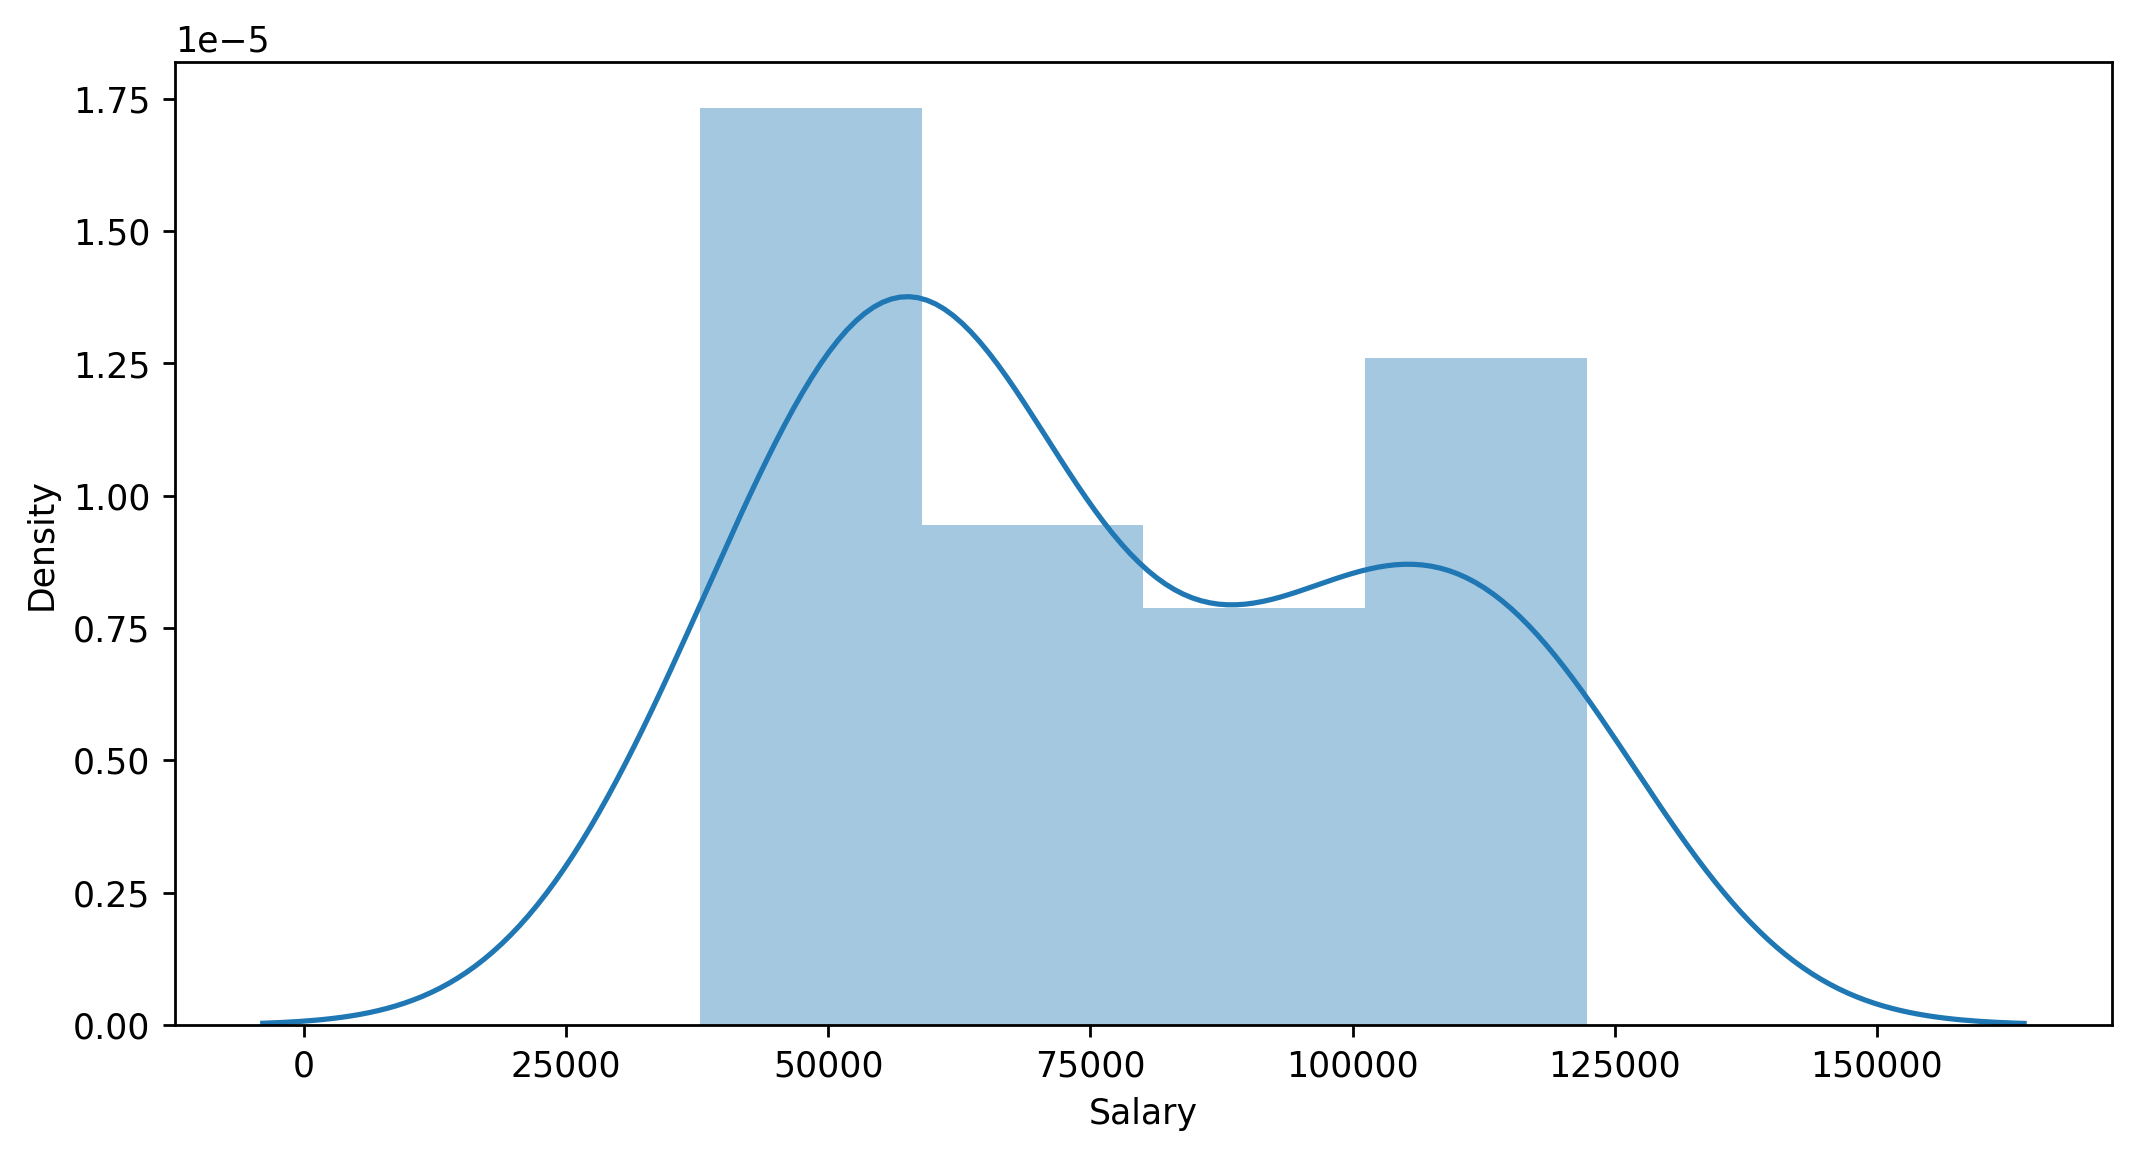

In [7]:
sns.distplot(df['Salary'])

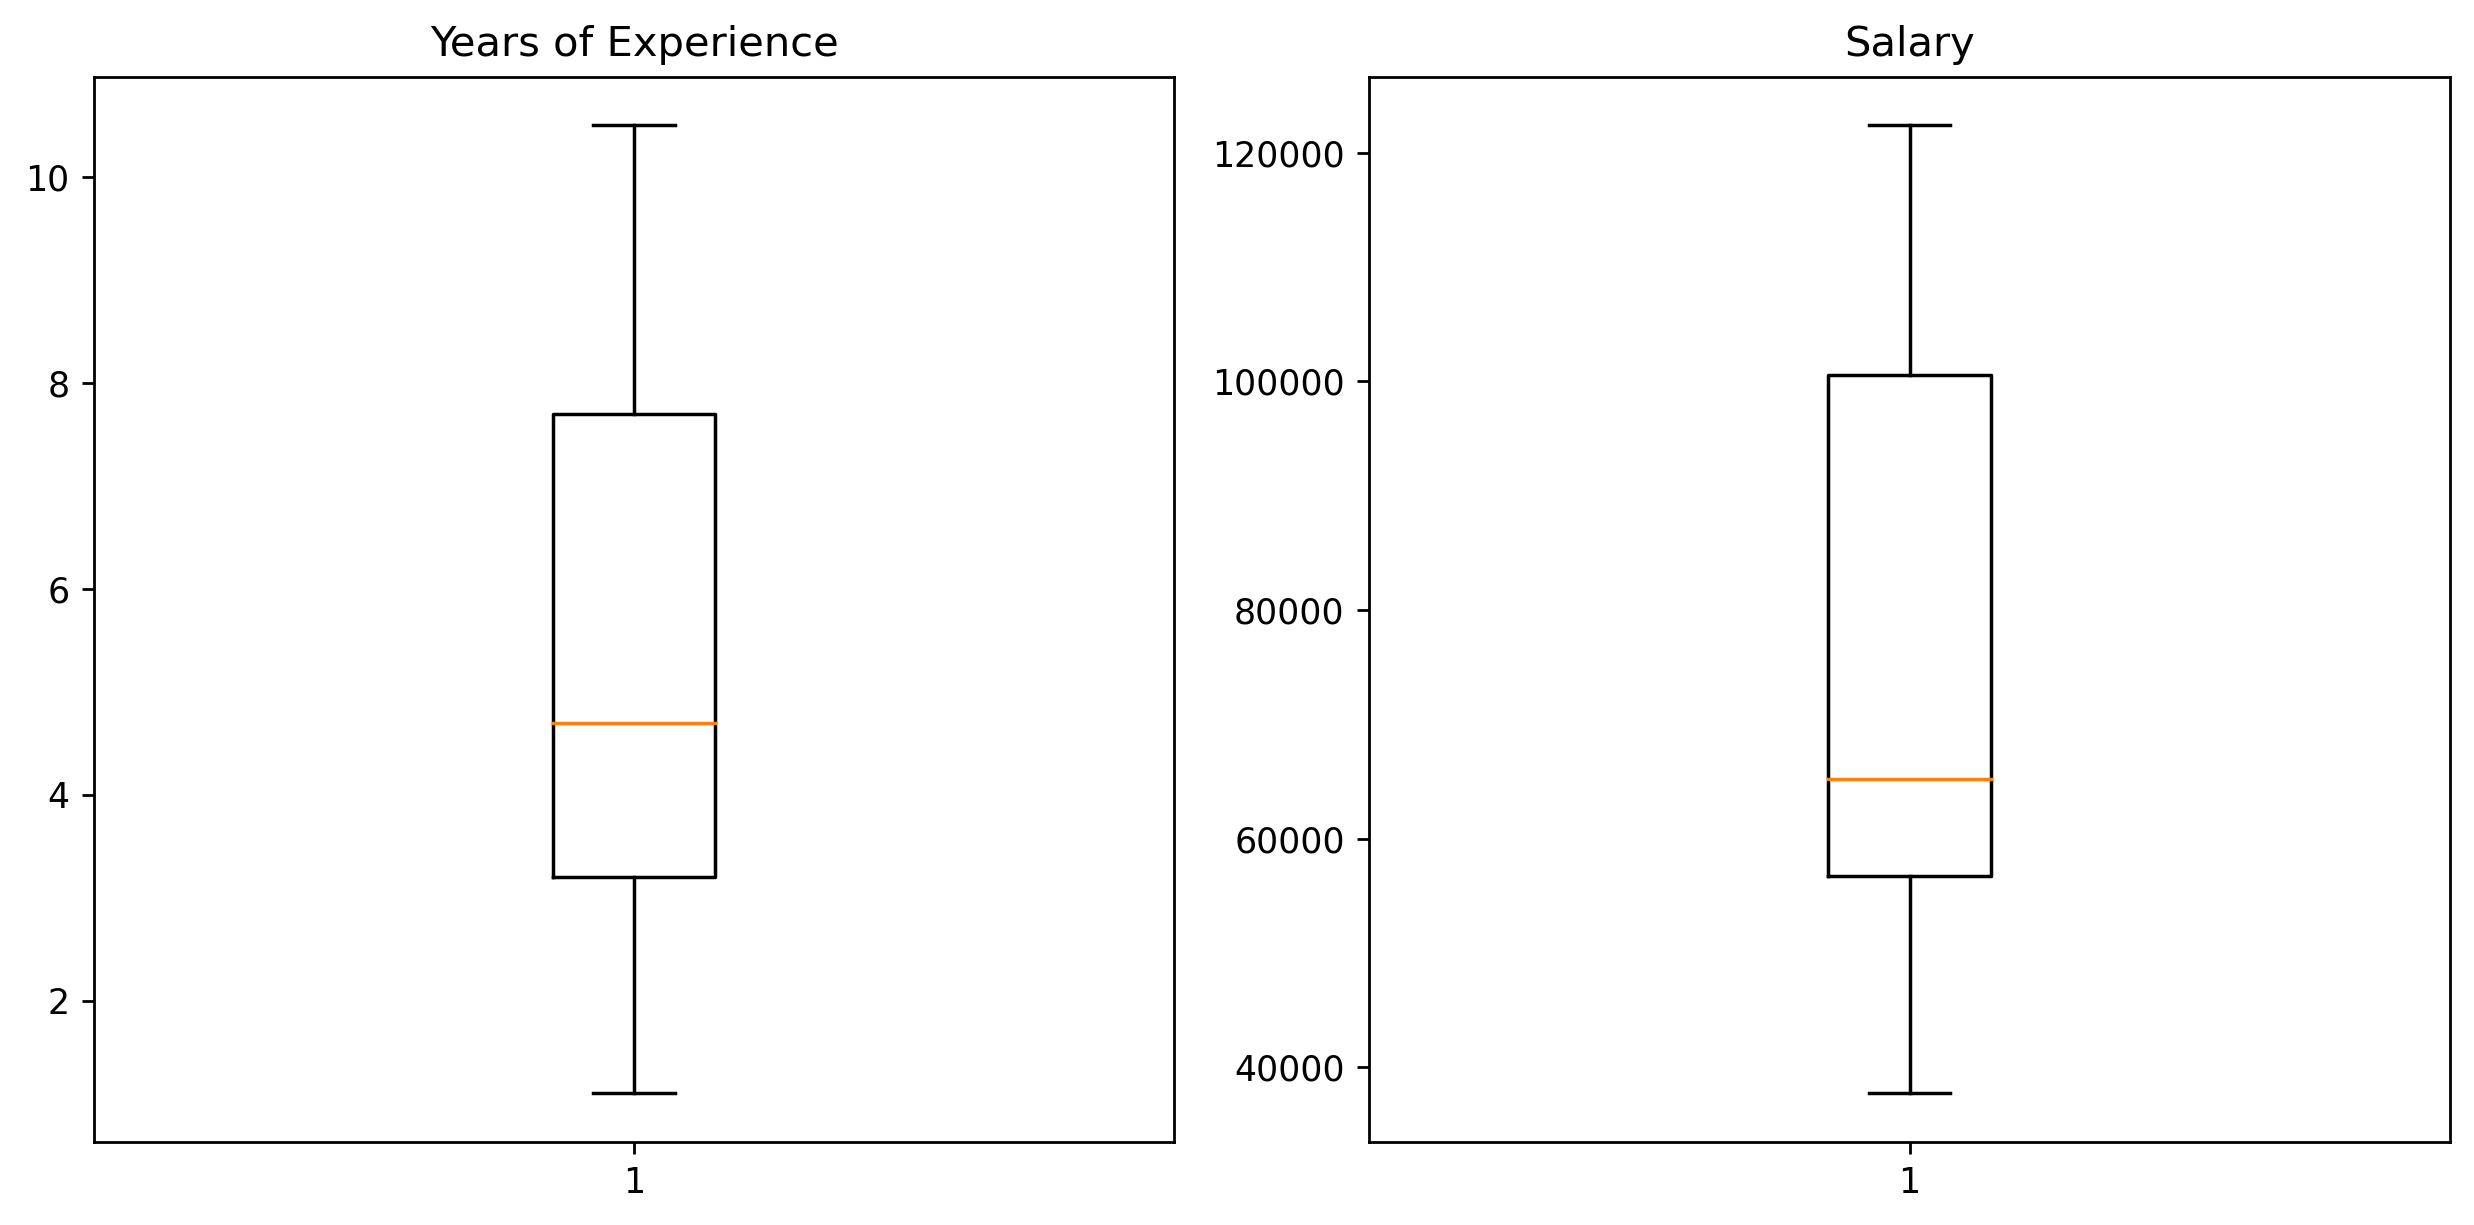

In [16]:
plt.subplot(1,2,1)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.subplot(1,2,2)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.tight_layout()

# EDA

- No NA/Missing values found
- No outliers found
- Datatypes are correct
- NO duplicates found

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


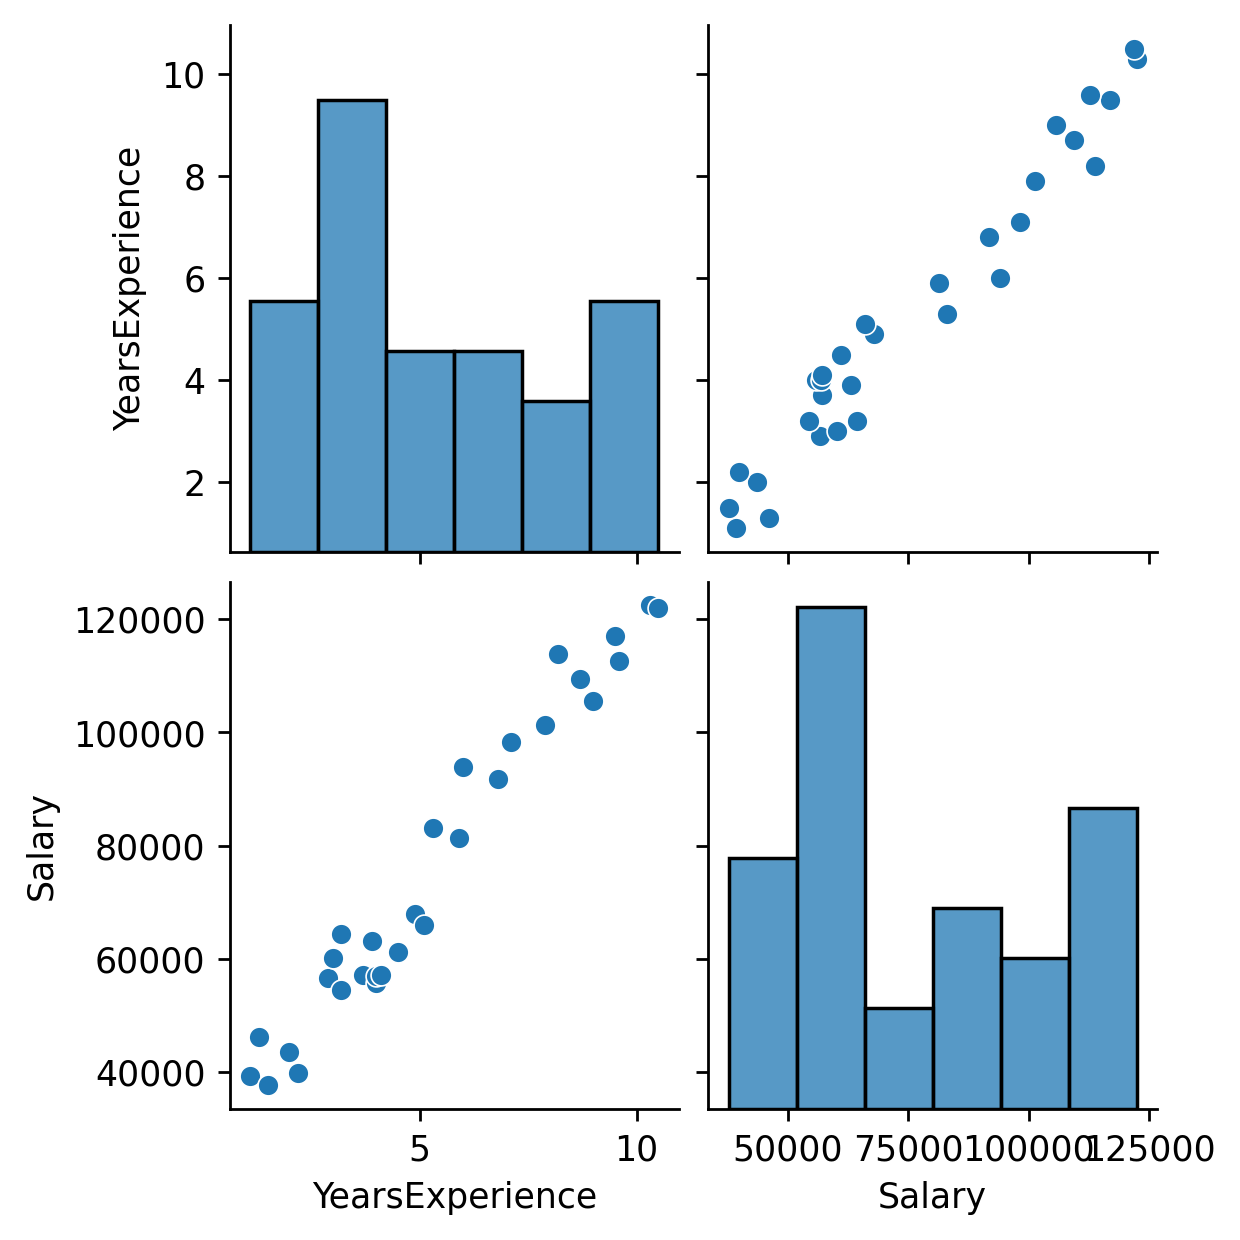

In [15]:
sns.pairplot(df)

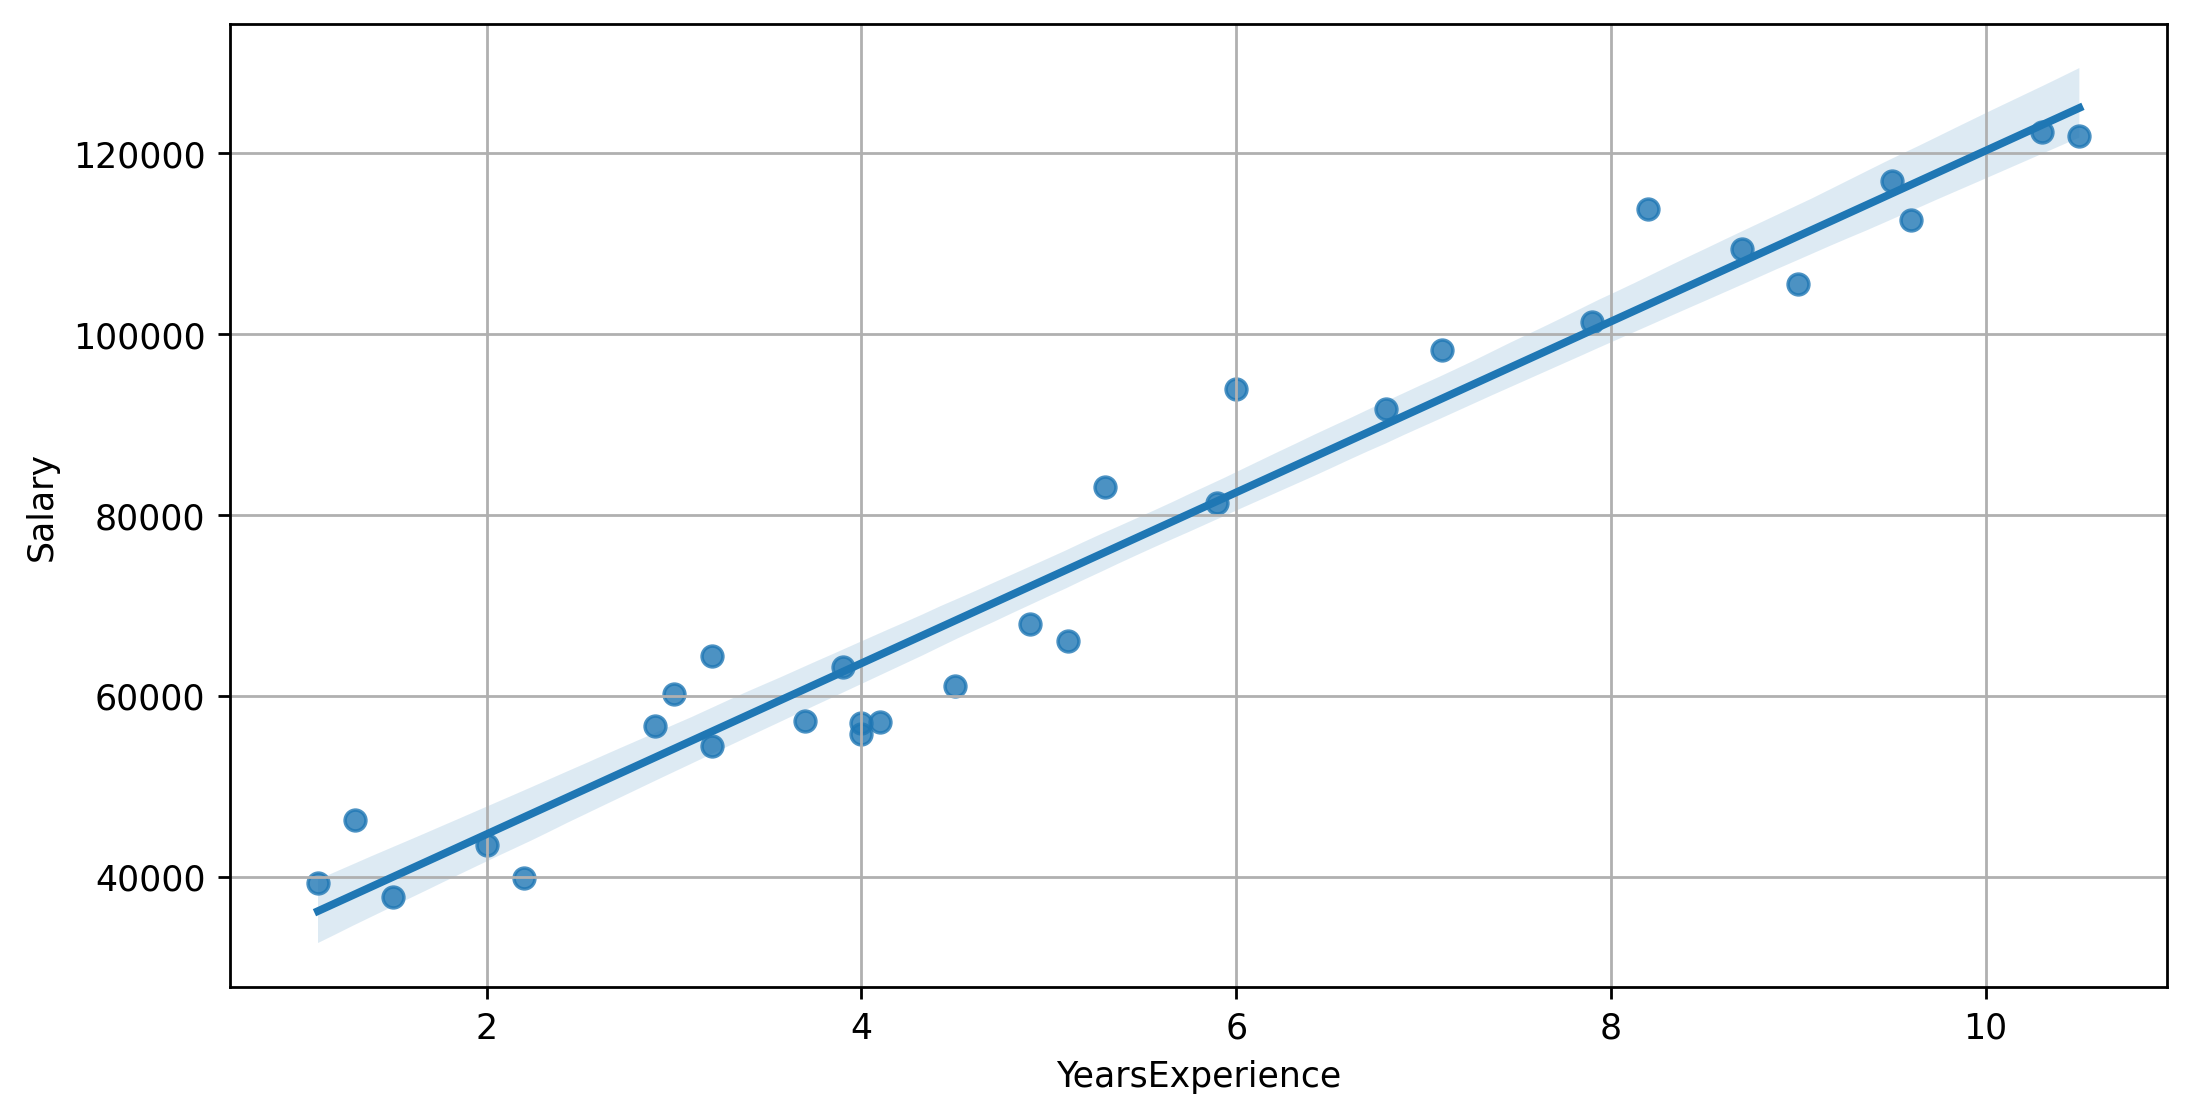

In [12]:
sns.regplot(x = df['YearsExperience'], y = df['Salary'])
plt.grid()

In [ ]:
#Feature Engineering

In [21]:
df = df.rename({'YearsExperience' : 'Experience'}, axis = 1)
df

,Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [28]:
#Model building(without transformation)

In [22]:
import statsmodels.formula.api as smf

In [23]:
model = smf.ols('Salary~Experience', data = df).fit()
model

In [ ]:
#Model testing

In [24]:
model.params

Intercept     25792.200199
Experience     9449.962321
dtype: float64

In [25]:
model.tvalues, model.pvalues

(Intercept     11.346940
 Experience    24.950094
 dtype: float64,
 Intercept     5.511950e-12
 Experience    1.143068e-20
 dtype: float64)

In [26]:
# R square value

In [ ]:
model.rsquared, model.rsquared_adj

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        15:03:02   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Transformations

# 1) Log Transformation:

As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

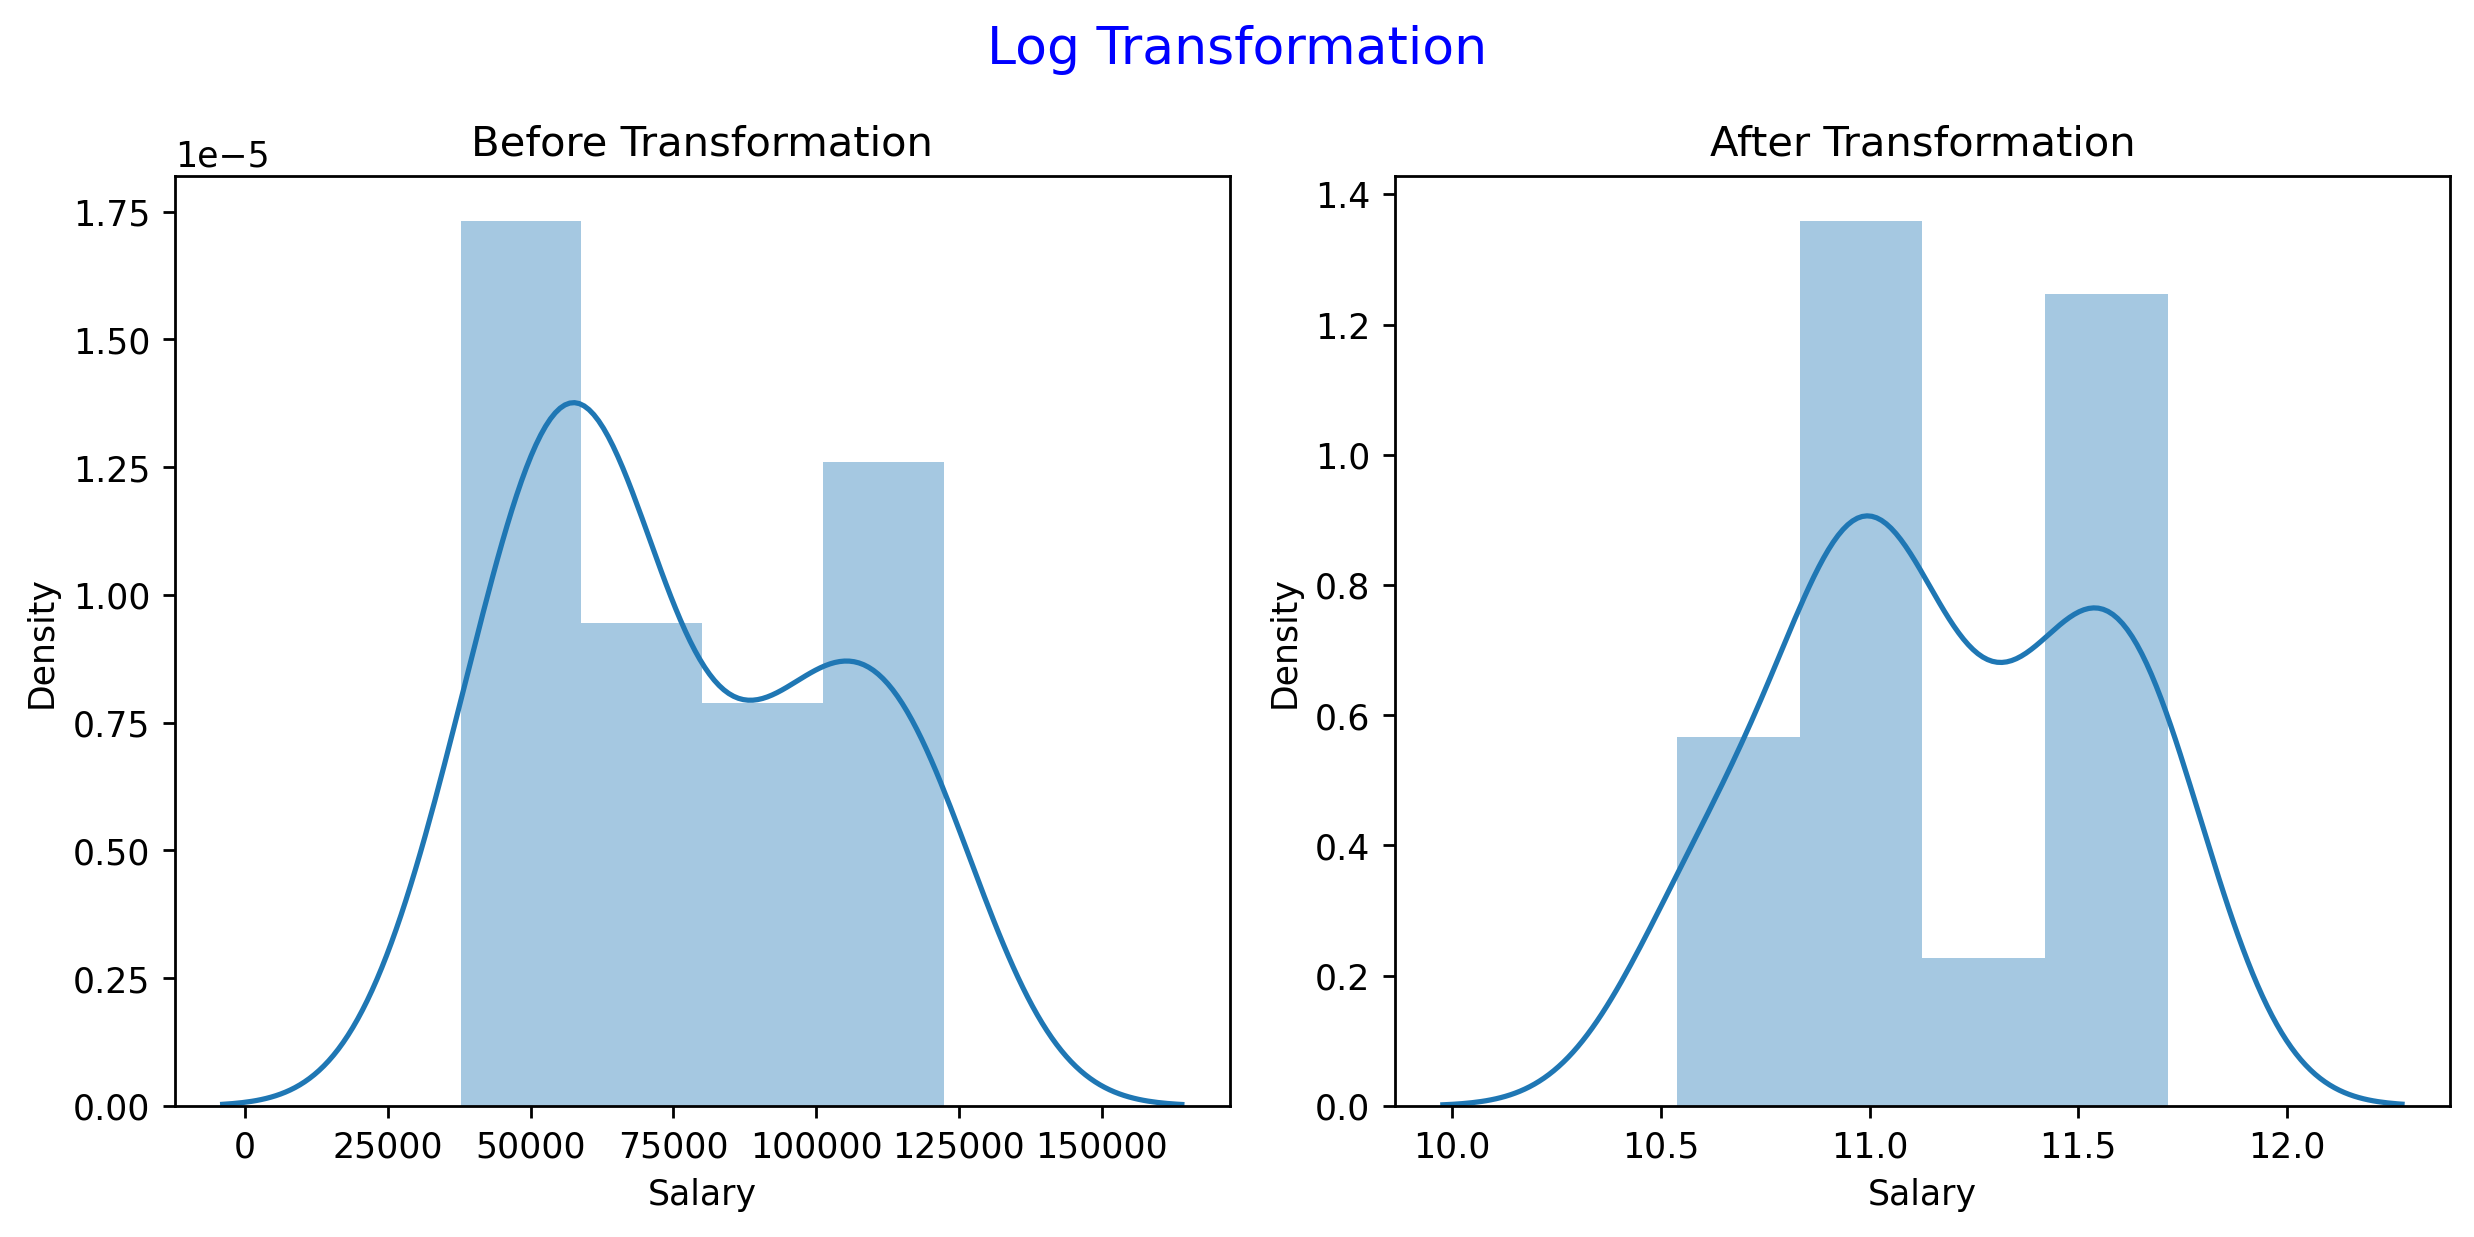

In [29]:
plt.subplots(1,2)
plt.suptitle('Log Transformation', color = 'b', size = 15)
plt.subplot(1,2,1)
plt.title('Before Transformation')
sns.distplot(df['Salary'])
plt.subplot(1,2,2)
plt.title('After Transformation')
sns.distplot(np.log(df['Salary']))
plt.tight_layout()

**Model building using log transformation**

In [30]:
model_1 = smf.ols("(np.log(df['Salary']))~(np.log(df['Experience']))", data = df).fit()

In [31]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(df['Salary'])   R-squared:                       0.905
Model:                              OLS   Adj. R-squared:                  0.902
Method:                   Least Squares   F-statistic:                     267.4
Date:                  Sun, 19 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                          15:07:39   Log-Likelihood:                 23.209
No. Observations:                    30   AIC:                            -42.42
Df Residuals:                        28   BIC:                            -39.61
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3280      0.056    184.868      0.000      10.214      10.442
np.log(df['Experience'])     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2) Square Root Transformation:

As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

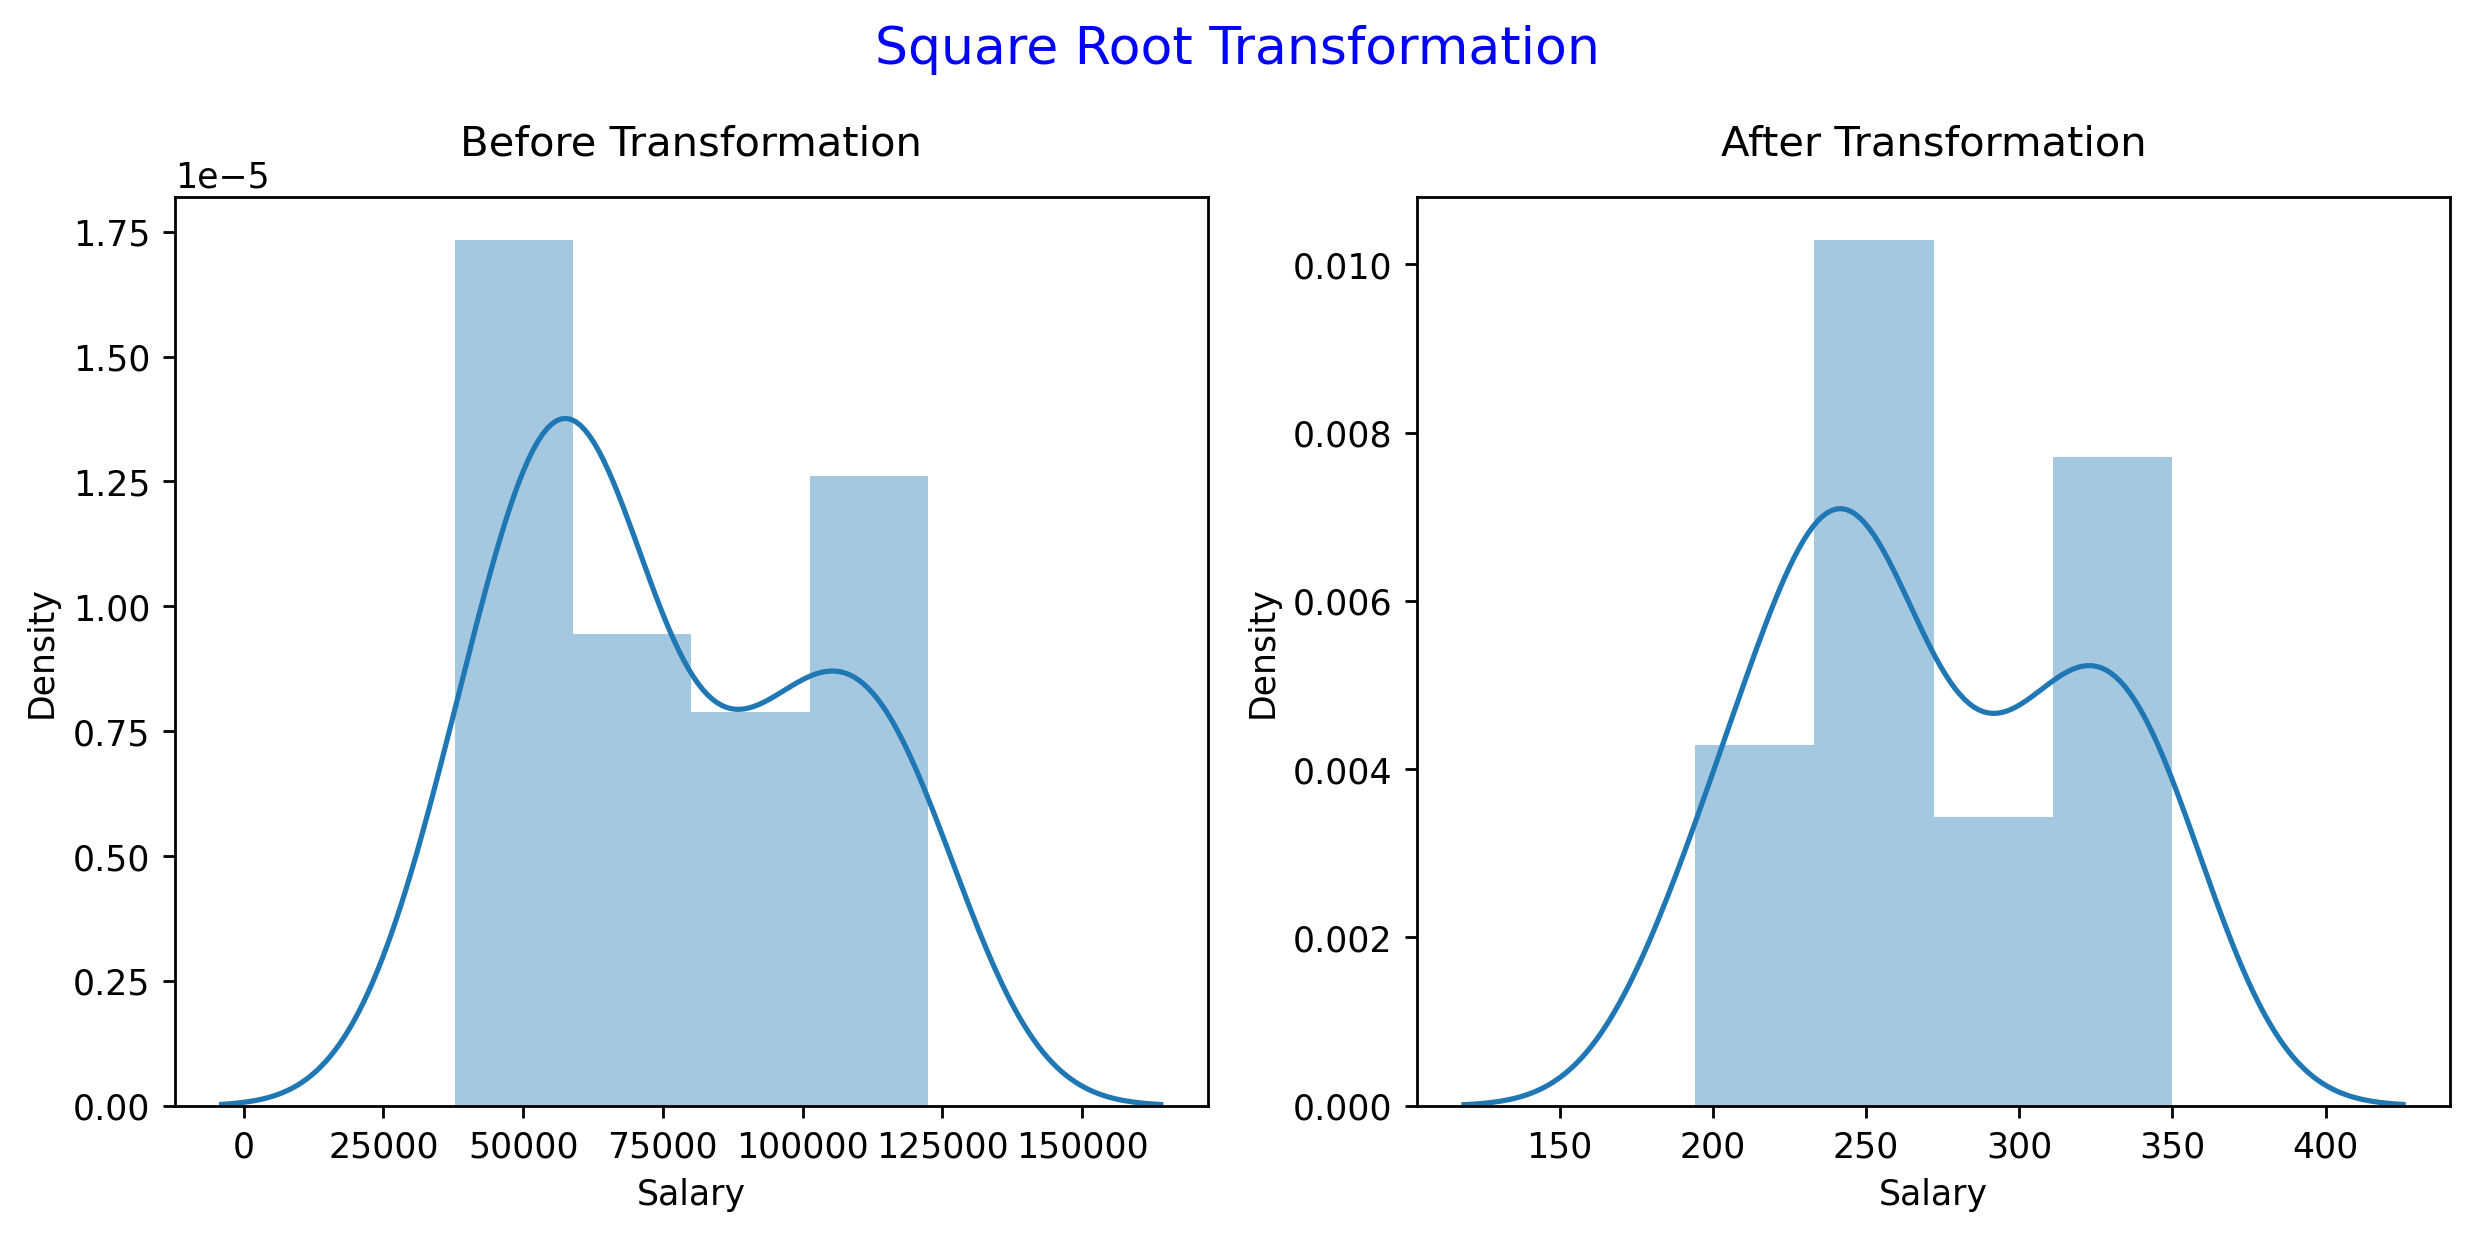

In [33]:
plt.subplots(1,2)
plt.suptitle('Square Root Transformation', color = 'b', size = 15)
plt.subplot(1,2,1)
plt.title('Before Transformation', pad = 12)
sns.distplot(df['Salary'])
plt.subplot(1,2,2)
plt.title('After Transformation', pad = 12)
sns.distplot(np.sqrt(df['Salary']))
plt.tight_layout()

**Model building using square root transformation**

In [34]:
model_2 = smf.ols("(np.sqrt(df['Salary']))~(np.sqrt(df['Experience']))", data = df).fit()

In [35]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(df['Salary'])   R-squared:                       0.942
Model:                               OLS   Adj. R-squared:                  0.940
Method:                    Least Squares   F-statistic:                     454.3
Date:                   Sun, 19 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                           15:11:41   Log-Likelihood:                -116.52
No. Observations:                     30   AIC:                             237.0
Df Residuals:                         28   BIC:                             239.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(df['Experience'])    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3) Cube Root Transformation

As we can see above our data is not normally distributed so we can applying log transformation on given data to get a normal distribution and remove skewness.

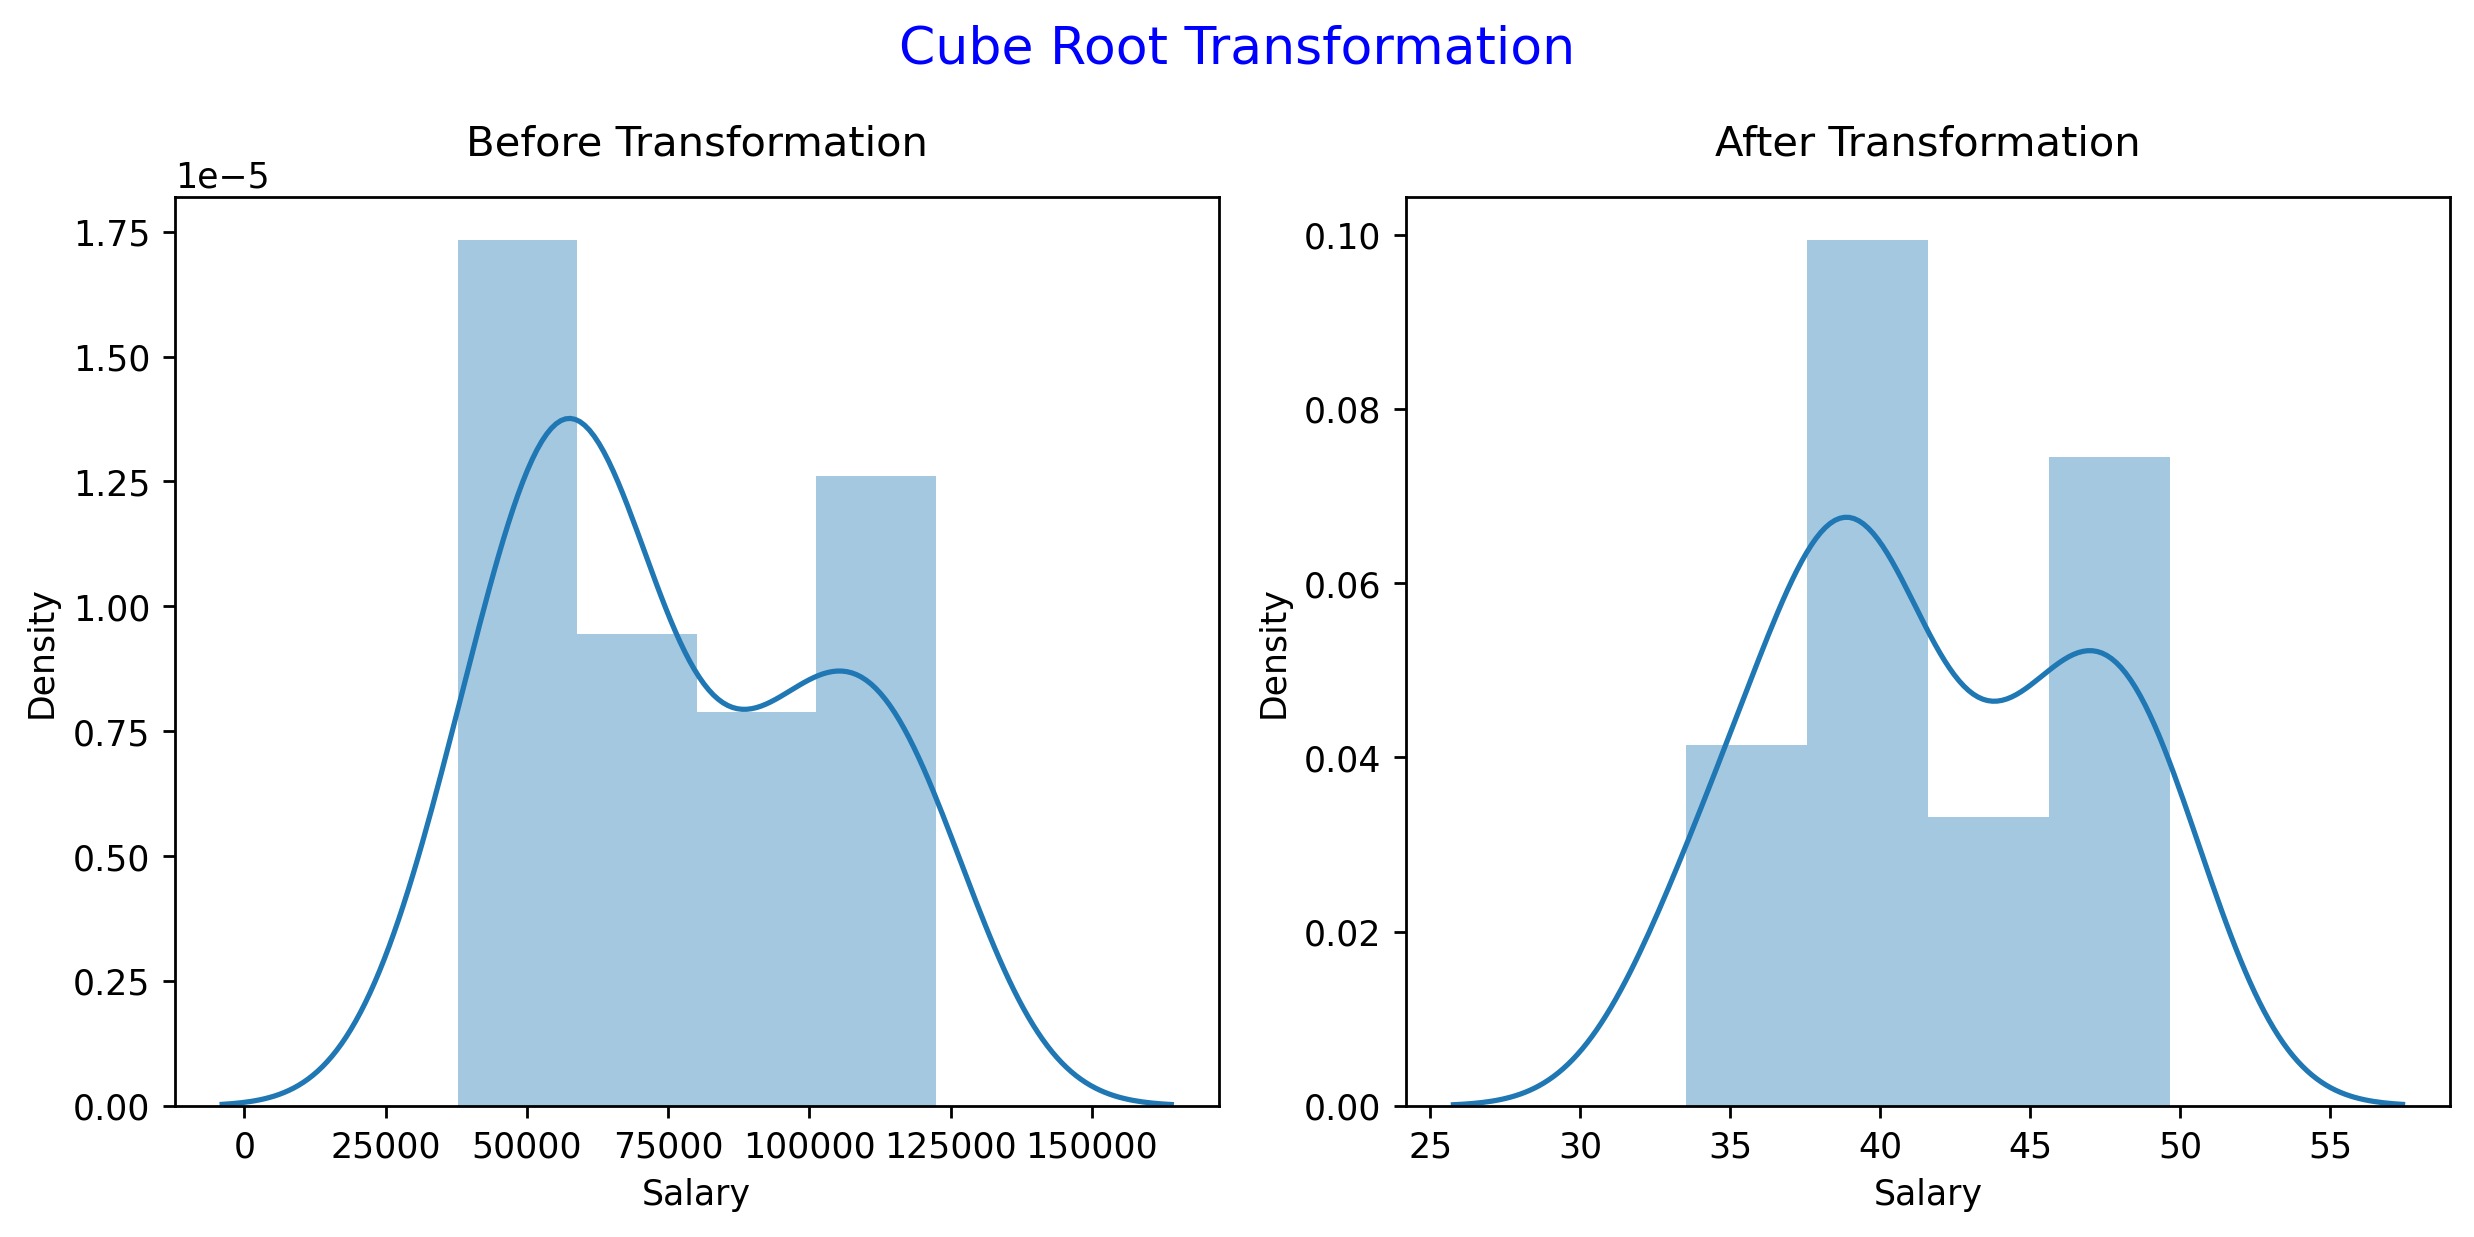

In [38]:
plt.subplots(1,2)
plt.suptitle('Cube Root Transformation', color = 'b', size = 15)
plt.subplot(1,2,1)
plt.title('Before Transformation', pad = 12)
sns.distplot(df['Salary'])
plt.subplot(1,2,2)
plt.title('After Transformation', pad = 12)
sns.distplot(np.cbrt(df['Salary']))
plt.tight_layout()

**Model building using cube root transformation**

In [39]:
model_3 = smf.ols("(np.cbrt(df['Salary']))~(np.cbrt(df['Experience']))", data = df).fit()

In [40]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.cbrt(df['Salary'])   R-squared:                       0.932
Model:                               OLS   Adj. R-squared:                  0.930
Method:                    Least Squares   F-statistic:                     386.5
Date:                   Sun, 19 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                           15:17:26   Log-Likelihood:                -50.589
No. Observations:                     30   AIC:                             105.2
Df Residuals:                         28   BIC:                             108.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(df['Experience'])    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Here in 1st Salary_model (without transformation) we get the higher values of R-Squared and Adjusted R-Squared, so we use this model for predictions.**

# Prediction of salary hike based on years of experience.

In [41]:
Predicted3 = pd.DataFrame()
Predicted3['Experience'] = df['Experience']
Predicted3['Salary'] = df['Salary']
Predicted3['Predicted_Salary'] = round(model.predict(Predicted3['Experience']), 2)
Predicted3

,Experience,Salary,Predicted_Salary
0,1.1,39343.0,36187.16
1,1.3,46205.0,38077.15
2,1.5,37731.0,39967.14
3,2.0,43525.0,44692.12
4,2.2,39891.0,46582.12
5,2.9,56642.0,53197.09
6,3.0,60150.0,54142.09
7,3.2,54445.0,56032.08
8,3.2,64445.0,56032.08
9,3.7,57189.0,60757.06


In [42]:
df['Experience'].agg(['min','max'])

min     1.1
max    10.5
Name: Experience, dtype: float64

In [43]:
# prediction salary hike for below years of experience
#Ex.- 1.8,2.9,3.5,4.8,7,9.5.

In [44]:
Experience = pd.DataFrame()
Experience['Experience'] = [1.8,2.9,3,4.8,5,7,9.5]
Experience['Predicted_Salary'] = round(model.predict(Experience['Experience']), 2)
Experience

,Experience,Predicted_Salary
0,1.8,42802.13
1,2.9,53197.09
2,3.0,54142.09
3,4.8,71152.02
4,5.0,73042.01
5,7.0,91941.94
6,9.5,115566.84
